In [20]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

In [12]:
drug_data=pd.read_excel("nluc_6_10_21.xlsx",index_col=0)
drug_data=drug_data.drop('H')
drug_data=drug_data.drop([9,10,11,12,"Unnamed: 13"],axis=1)
drug_data

,1,2,3,4,5,6,7,8
A,776838,584855,810810,789477,885430,728478,946640,853843
B,763648,545975,837141,707921,939925,791378,913753,880119
C,689245,686170,532761,805786,818000,960928,913966,818380
D,733822,565958,582210,789139,892626,838290,76,958182
E,765550,560429,793243,784937,794529,971620,920408,791762
F,615732,495450,647973,621003,764691,805425,776272,910657
G,659190,489882,804299,759527,839632,753486,832072,909939


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_Vehicle v.s. 6_0.6 uM CID2011756: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.700e+01
3_Vehicle v.s. 3_0.6 uM CID2011756: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.975e-02 U_stat=4.700e+01
24_Vehicle v.s. 24_0.6 uM CID2011756: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.900e+01
48_Vehicle v.s. 48_0.6 uM CID2011756: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.600e+01


(<matplotlib.axes._subplots.AxesSubplot at 0x7ff506a35da0>,
  <statannot.StatResult.StatResult at 0x7ff5057c2588>])

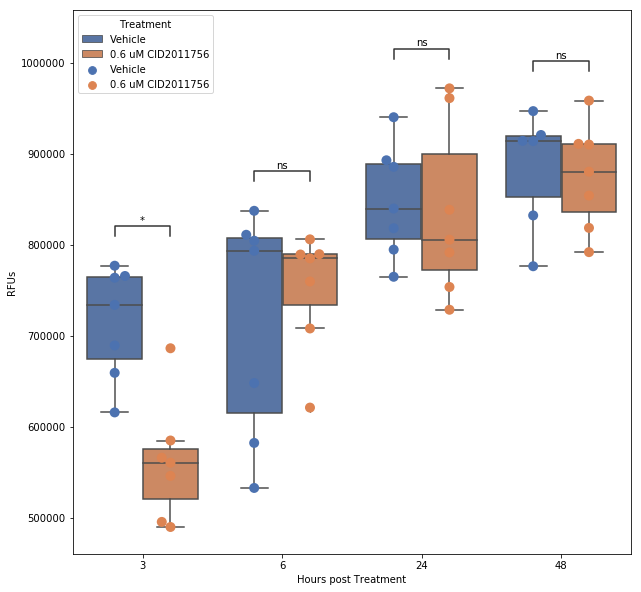

In [30]:
new_drug_np=[]
treatment=["Vehicle","0.6 uM CID2011756"]
timepoint=[3,6,24,48]

for row in drug_data.itertuples():
    i=0

    for value in row[1:]:
        if value<1000:
            pass
        else:
            new_drug_np.append([value,timepoint[i//2],treatment[i%2]])   
        i+=1        
        
new_drug_df=pd.DataFrame(new_drug_np)
new_drug_df.columns=["RFUs","Hours post Treatment","Treatment"]
new_drug_df
box_pairs=[
    ((3,"Vehicle"),(3,"0.6 uM CID2011756")),
    ((6,"Vehicle"),(6,"0.6 uM CID2011756")),
    ((24,"Vehicle"),(24,"0.6 uM CID2011756")),
    ((48,"Vehicle"),(48,"0.6 uM CID2011756"))
]
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(ax=ax,x="Hours post Treatment", y="RFUs",data=new_drug_df,hue="Treatment", palette="deep")
sns.swarmplot(ax=ax,x="Hours post Treatment",y="RFUs",data=new_drug_df,hue="Treatment",dodge=True,size=10,palette="deep")
add_stat_annotation(ax, data=new_drug_df, hue="Treatment", x="Hours post Treatment", y="RFUs", text_format='star', loc='inside', verbose=2,test="Mann-Whitney",box_pairs=box_pairs)